# Choropleth Map of Oil Palm Hotspot in Indonesia
## An approach using Python programming

_Sachnaz Desta Oktarina - 16 January 2020_

First of all as the rule of thumb, we have to activate necessary libaries. If you havent installed them, go typing `conda` or `pip install` either on your `jupyter` environment or `kernel`. Dont forget to check their dependencies too

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

Then, you may call your desired shapefile data set. Here, I made use Indonesian administrative data taken from __[Diva GIS](http://www.diva-gis.org/gdata)__

In [4]:

# set the filepath and load in a shapefile
fp = "data/indonesia/IDN_adm1.shp"
map_df = gpd.read_file(fp)
# inspect the GeoDataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,106,IDN,Indonesia,1,Aceh,Propinsi,Autonomous Province,None,Achin|Atjeh|Nanggroe Aceh Darussalam,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9..."
1,106,IDN,Indonesia,2,Bali,Propinsi,Province,None,Penida|Lembongan|Ceningan|Menjangan,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ..."
2,106,IDN,Indonesia,3,Bangka-Belitung,Propinsi,Province,None,Babel|Kepulauan Bangka Belitung,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ..."
3,106,IDN,Indonesia,4,Banten,Propinsi,Province,None,None,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ..."
4,106,IDN,Indonesia,5,Bengkulu,Propinsi,Province,None,Bencoolen|Benkoelen|Benkulen,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ..."


In [3]:
print(map_df)

    ID_0  ISO     NAME_0  ID_1               NAME_1                 TYPE_1  \
0    106  IDN  Indonesia     1                 Aceh               Propinsi   
1    106  IDN  Indonesia     2                 Bali               Propinsi   
2    106  IDN  Indonesia     3      Bangka-Belitung               Propinsi   
3    106  IDN  Indonesia     4               Banten               Propinsi   
4    106  IDN  Indonesia     5             Bengkulu               Propinsi   
5    106  IDN  Indonesia     6            Gorontalo               Propinsi   
6    106  IDN  Indonesia     7     Irian Jaya Barat               Propinsi   
7    106  IDN  Indonesia     8         Jakarta Raya  Daerah Khusus Ibukota   
8    106  IDN  Indonesia     9                Jambi               Propinsi   
9    106  IDN  Indonesia    10           Jawa Barat               Propinsi   
10   106  IDN  Indonesia    11          Jawa Tengah                   City   
11   106  IDN  Indonesia    12           Jawa Timur             

Furthermore, we can add another one data contained our point of interest. The separate data was extracted from the Decree of Indonesian Ministry of Agriculture no. 833/KPTS/SR0.20/M/12/2019. It resulted that the national oil palm land cover is about 16.381.959 ha

In [5]:
province = pd.read_csv("data/data_luas3.csv")
province.head()

,ID_1,Province,Area (Ha),Percentage (%)
0,1,Aceh,535002.06530,3.265800
1,2,Bali,NaN,NaN
2,3,Bangka-Belitung,273842.03340,1.671607
3,4,Banten,18365.00224,0.112105
4,5,Bengkulu,426508.05210,2.603523


Combine both of the datasets and assign as `merged`. Conduct this process using `left join`. 

In [ ]:

# join the geodataframe with the csv dataframe
merged = map_df.merge(province, how='left', left_on="NAME_1", right_on="Province")
merged = merged[['Province', 'geometry', 'Area (Ha)', 'Percentage (%)']]

merged.head()

In [13]:
#print(merged)

               Province                                           geometry  \
0                  Aceh  MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9...   
1                  Bali  MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ...   
2       Bangka-Belitung  MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ...   
3                Banten  MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ...   
4              Bengkulu  MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ...   
5             Gorontalo  MULTIPOLYGON (((122.12139 0.40583, 122.12167 0...   
6      Irian Jaya Barat  MULTIPOLYGON (((133.50668 -4.32504, 133.50676 ...   
7          Jakarta Raya  MULTIPOLYGON (((106.73338 -6.09776, 106.73373 ...   
8                 Jambi  MULTIPOLYGON (((104.21628 -1.06326, 104.21578 ...   
9            Jawa Barat  MULTIPOLYGON (((107.85297 -7.73661, 107.85330 ...   
10          Jawa Tengah  MULTIPOLYGON (((109.01002 -7.68037, 109.01002 ...   
11           Jawa Timur  MULTIPOLYGON (((114.02917 -8.64806, 114

If you feel that it is necessary, you may also rename some provinces into more distinct and easy one.

In [7]:
d = {'Aceh':'ACEH','Bali':'BALI','Bangka-Belitung':'BABEL','Banten':'BT','Bengkulu':'BENGKULU','Gorontalo':'GORONTALO','Irian Jaya Barat':'PAPBAR','Jakarta Raya':'DKI','Jambi':'JAMBI',
    'Jawa Barat':'JABAR','Jawa Tengah':'JATENG','Jawa Timur':'JATIM','Kalimantan Barat':'KALBAR','Kalimantan Selatan':'KALSEL','Kalimantan Tengah':'KALTENG','Kalimantan Timur':'KALTIM','Kalimantan Utara':'KALUT','Kepulauan Riau':'KEP.RI',
    'Lampung':'LAMPUNG','Maluku Utara':'MALUT','Maluku':'MALUKU','Nusa Tenggara Barat':'NTB','Nusa Tenggara Timur':'NTT','Papua':'PAPUA','Riau':'RIAU','Sulawesi Barat':'SULBAR','Sulawesi Selatan':'SUSEL',
    'Sulawesi Tengah':'SULTAH','Sulawesi Tenggara':'SULTGR','Sulawesi Utara':'SULUT','Sumatera Barat':'SUMBAR','Sumatera Selatan':'SUMSEL','Sumatera Utara':'SUMUT','Yogyakarta':'DIY'}
merged2 = merged.replace(d)
merged2.head()

,Province,geometry,Area (Ha),Percentage (%)
0,ACEH,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9...",535002.06530,3.265800
1,BALI,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ...",NaN,NaN
2,BABEL,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ...",273842.03340,1.671607
3,BT,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ...",18365.00224,0.112105
4,BENGKULU,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ...",426508.05210,2.603523


In [31]:
print(merged2)

     Province                                           geometry  \
0        ACEH  MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9...   
1        BALI  MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ...   
2       BABEL  MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ...   
3          BT  MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ...   
4    BENGKULU  MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ...   
5   GORONTALO  MULTIPOLYGON (((122.12139 0.40583, 122.12167 0...   
6      PAPBAR  MULTIPOLYGON (((133.50668 -4.32504, 133.50676 ...   
7         DKI  MULTIPOLYGON (((106.73338 -6.09776, 106.73373 ...   
8       JAMBI  MULTIPOLYGON (((104.21628 -1.06326, 104.21578 ...   
9       JABAR  MULTIPOLYGON (((107.85297 -7.73661, 107.85330 ...   
10     JATENG  MULTIPOLYGON (((109.01002 -7.68037, 109.01002 ...   
11      JATIM  MULTIPOLYGON (((114.02917 -8.64806, 114.02917 ...   
12     KALBAR  MULTIPOLYGON (((110.20528 -3.06639, 110.20528 ...   
13     KALSEL  MULTIPOLYGON (((117.05028 -5.0883

For more convenience, we can change variable name of `Percentage (%)` to `percent`.

In [8]:
#rename variable name:
merged2.rename(columns={'Percentage (%)':'percent'}, inplace=True)

In [9]:
merged2.head()

,Province,geometry,Area (Ha),percent
0,ACEH,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9...",535002.06530,3.265800
1,BALI,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ...",NaN,NaN
2,BABEL,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ...",273842.03340,1.671607
3,BT,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ...",18365.00224,0.112105
4,BENGKULU,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ...",426508.05210,2.603523


You can start plot it now. in total there are 26 provinces among total 34 provinces in Indonesia that cultivated oil palm. The remaining 8 provinces are shaded `lightgrey` as a sign that the data is not available (`NaN`)

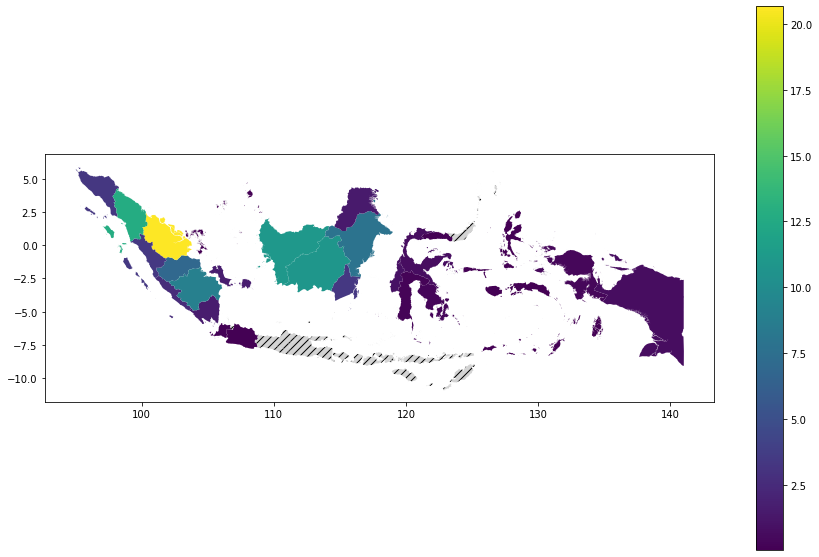

In [12]:
ax = merged2[merged2.percent.notna()].plot(column='percent', figsize=(15, 10), legend=True)
merged2[merged2.percent.isna()].plot(color='lightgrey', hatch='///', ax=ax)

You may also increase the size of the plot by changing the `figsize` to your desirable numbers. Here i tried `figzise=(30,10)`

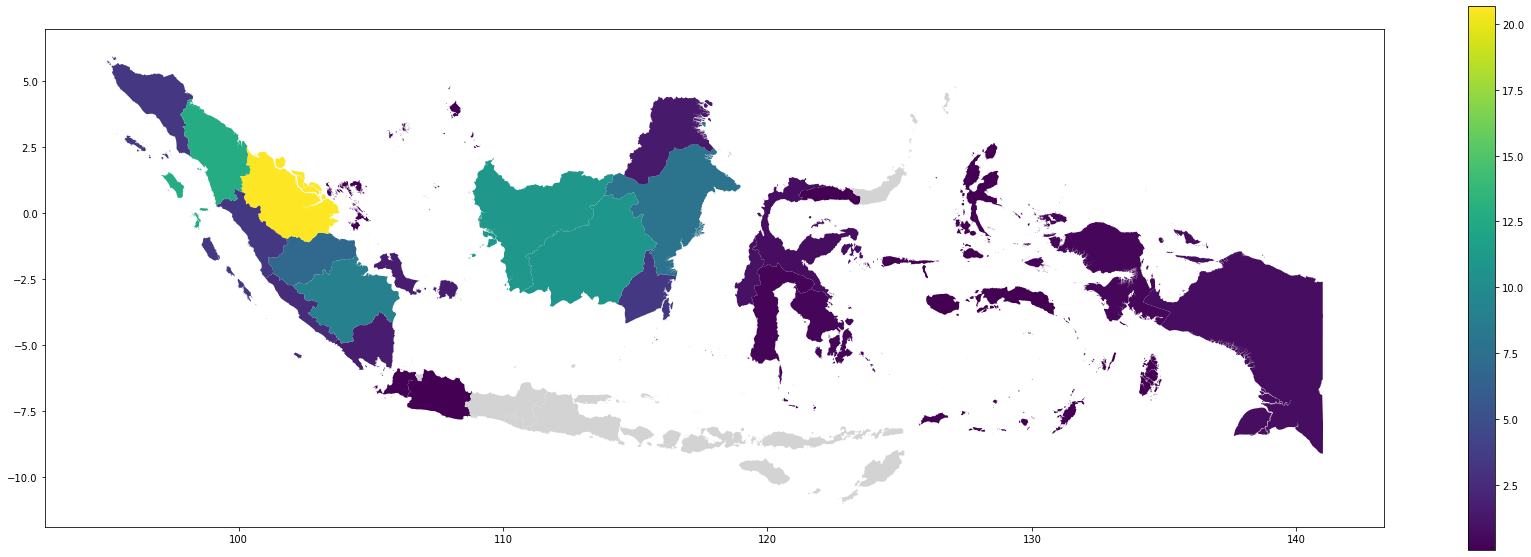

In [10]:
ax = merged2[merged2.percent.notna()].plot(column='percent', figsize=(30, 10), legend=True)
merged2[merged2.percent.isna()].plot(color='lightgrey', hatch='///', ax=ax)

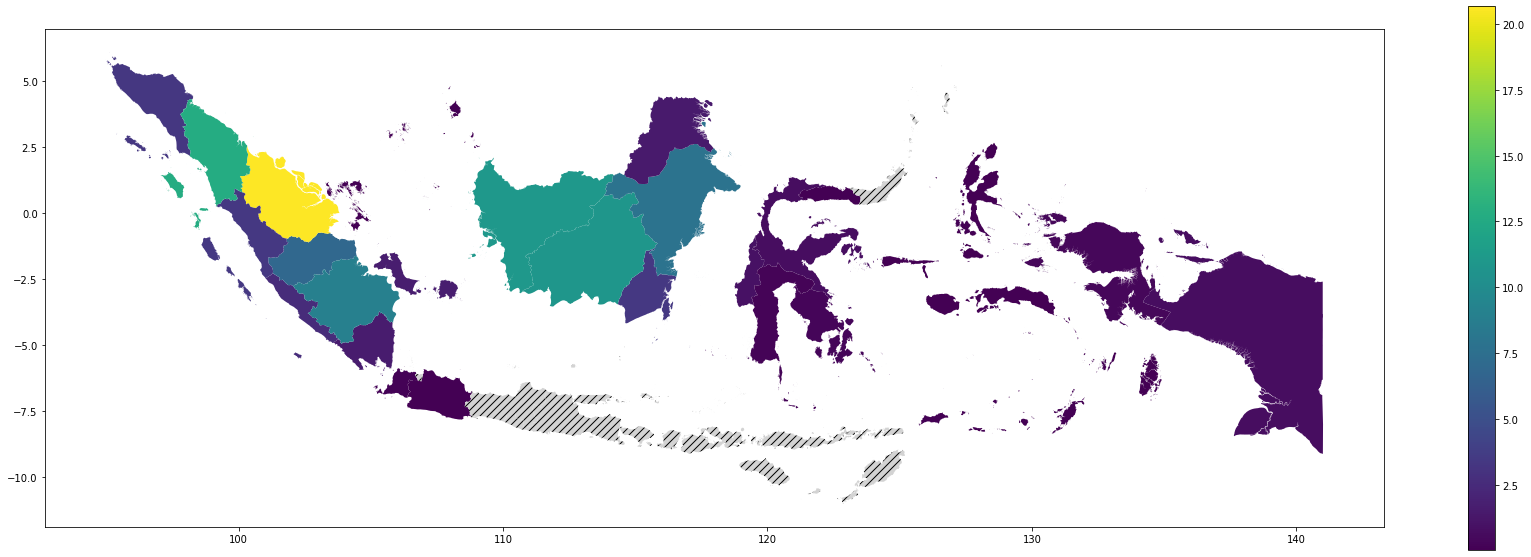

In [16]:
ax = merged2[merged2.percent.notna()].plot(column='percent', figsize=(30, 10), legend=True)
merged2[merged2.percent.isna()].plot(color='lightgrey', hatch='///', ax=ax)

Finally, you can add Title as well as changing orientation of the legend bar. I added argument `legend_kwds` to make it as i wanted it to be.

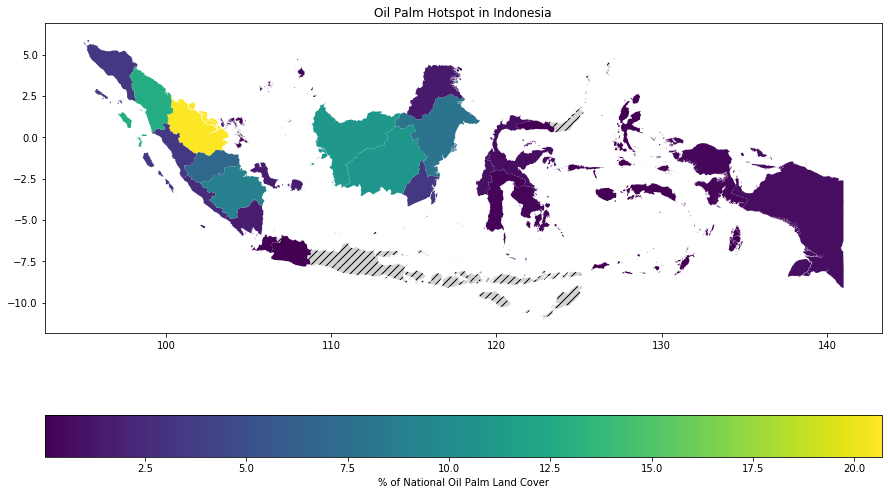

In [29]:

ax = merged2[merged2.percent.notna()].plot(column='percent', figsize=(15, 10), legend=True, legend_kwds={'label': "% of National Oil Palm Land Cover",
                         'orientation': "horizontal"})
merged2[merged2.percent.isna()].plot(color='lightgrey', hatch='///', ax=ax)
ax.set_title("Oil Palm Hotspot in Indonesia");
